## Artificial Neural Network

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/300px-Colored_neural_network.svg.png'>

For this post, we will discover the usage of Artificial Neural Networks (ANN). The architecture of the example network will be used is fairly simple: a single input layer for two features, two hidden layers with 5 hidden units each, and an output layer with two units corresponding to output classes. Each layer was fully-connected to the next one (these are known as "dense" layers), which showed how things can get complex fairly quickly. 

### Setting up our network

For our network, where $s_l$ represents a layer of neurons in the network:

- $s_1=2$  (two input features, not counting one bias unit)
- $s_2=5$  (five hidden units, not counting one bias unit)
- $s_3=5$  (five hidden units, not counting one bias unit)
- $s_4=2$  (two output classes)

For activation function, the sigmoid activation function will be used. Our cost function included a regularization term. 

In [1]:
import numpy as np
np.random.seed(0)
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


Generate some new datasets.

((1000,), (1000, 2))

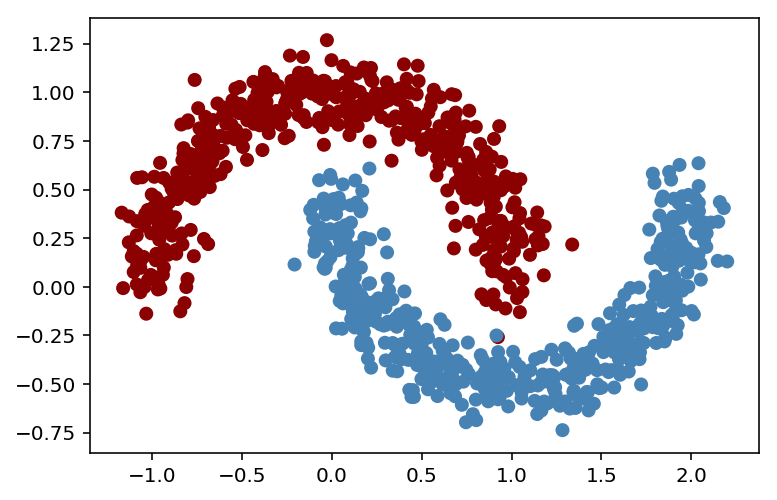

In [2]:
X, y = datasets.make_moons(n_samples=1000, noise=0.1, random_state=0)
colors = ['steelblue' if label == 1 else 'darkred' for label in y]
plt.scatter(X[:,0], X[:,1], color=colors)
y.shape, X.shape

### Defining the model

We first instantiate a model object, and then add layers to it with their respective activation functions and weight initializations. Keras has different activation functions built in such as 'sigmoid', 'tanh', 'softmax', and many others. Also built in are different weight initialization options. The choice of activation and initialization can be specified using kwargs when adding a layer to the model.

Our example network uses a sigmoid activation function and initializes the weights between  $[−\epsilon,\epsilon]$ . Where  $\epsilon$  is defined as:

$$\epsilon =\frac{\sqrt{6}}{\sqrt{L_{input}+L_{output}}}$$


In [7]:
# Define our model object
model = Sequential()

# Add layers to our model
model.add(Dense(units=5, input_shape=(2, ), activation='sigmoid', kernel_initializer='glorot_uniform'))
model.add(Dense(units=5, activation='sigmoid', kernel_initializer='glorot_uniform'))
model.add(Dense(units=1, activation='sigmoid', kernel_initializer='glorot_uniform'))

### Defining the optimizer

Here we will define a stochastic gradient descent optimizer with a learning rate, $\alpha$ of 0.01. In Keras, a stochastic gradient descent optimizer object is ``SGD``.

In [8]:
sgd = SGD(lr=0.1)

### Training the model

We can now train our model using the model.fit() method. Usually this method prints a nice text-based indicator of the training progress. We'll turn this off (verbose=0) since we're going to use a large number of iterations (epochs=4000).

We can also easily capture information about the training process in the ``History`` object returned by model.fit(). For good measure we'll also pass the ``shuffle=True`` so that our training data batches are shuffled before each pass.

In [10]:
# cross entropy loss function
model.compile(optimizer=sgd, loss='binary_crossentropy')

history = model.fit(X[:500], y[:500], verbose=0, epochs=4000, shuffle=True)

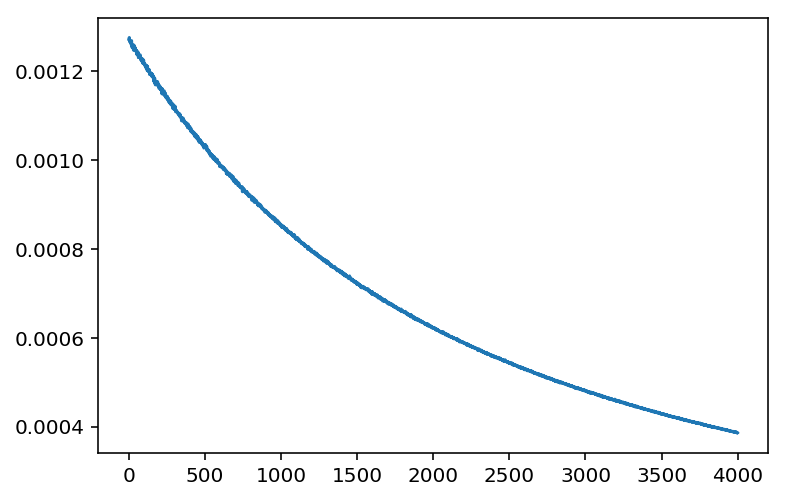

In [11]:
plt.plot(history.history['loss'])

### Visualizing the results

Here we'll use the ``plot_decision_boundary`` function and have it use a divergent color map.

In [12]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
    
    return fig, ax

(<matplotlib.figure.Figure at 0x12624fba8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x126502128>)

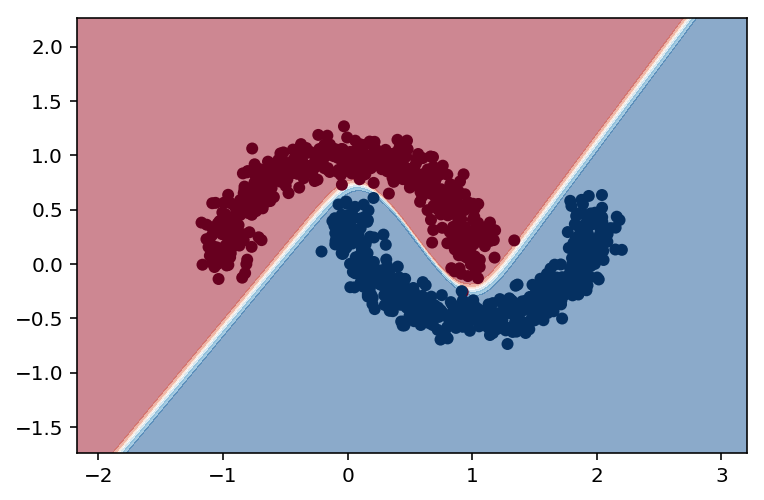

In [13]:
plot_decision_boundary(X, y, model, cmap='RdBu')

### Summary

In this post, we discovered that using a library dedicated to working with ANNs like Keras makes it much easier to get a model up and running.

We created our example ANN using only 7 lines of Keras, and we could easily choose our activation function, weight initialization, optimizer, and loss function.